In [605]:
import pandas as pd
import numpy as np

In [606]:
# Load the required csv files
genetics_csv_file_path = "../data/GENETIC_29Oct2024.csv"                        # For APVOLUME
upenbiomk_csv_file_path = "../data/UPENNBIOMK_ROCHE_ELECSYS_29Oct2024.csv"      # For ABETA42, TAU and PTAU
fugi_abeta_path = "../data/FUJIREBIOABETA_05Nov2024.csv"                        # For ABETA42, ABETA42/40
ugotptau181_csv_file_path = "../data/UGOTPTAU181_06_18_20_29Oct2024.csv"        # For PLASMAPTAU181
blenn_cfl_nfl_path = "../data/BLENNOWCSFNFL_05Nov2024.csv"                      # For CSF Nfl
ucsffsx6_csv_file_path = "../data/UCSFFSX6_07_06_23_29Oct2024.csv"              # For Cortical thickness in certain temporal region
ucsffsl51_csv_file_path = "../data/UCSFFSL51_03_01_22_29Oct2024.csv"            # For Cortical thickness in ceratin temporal region
ptdemog_csv_file_path = "../data/PTDEMOG_29Oct2024.csv"                         # For Patient gender and DOB
medhist_csv_file_path = "../data/MEDHIST_29Oct2024.csv"                         # For medical history of patient


# Selected columns
genetics_selected_columns = [
    "RID",
    "VISDATE",
    "APVOLUME"    
]
upenbiomk_selected_columns = [
    "RID",
    "EXAMDATE",
    "ABETA42",
    "TAU",
    "PTAU"
]
fugi_abeta_columns = [
    "RID",
    "EXAMDATE", 
    "ABETA42_40",
    "ABETA42",
    # "ABETA40"
]
ugotptau181_selected_columns = [
    "RID",
    "EXAMDATE",
    "PLASMAPTAU181"
]
blenn_cfl_nfl_columns = [
    "RID",
    "EXAMDATE", 
    "CSFNFL"
]
ucsffsx6_selected_columns = [
    "RID",
    "EXAMDATE",
    "ST58TA",  # Cortical Thickness Average of Left Superior Temporal
    "ST117TA", # Cortical Thickness Average of Right Superior Temporal
    "ST40TA",  # Cortical Thickness Average of Left Middle Temporal
    "ST99TA",  # Cortical Thickness Average of Right Middle Temporal
    "ST32TA",  # Cortical Thickness Average of Left Inferior Temporal
    "ST91TA",  # Cortical Thickness Average of Right Inferior Temporal
    "ST60TA",  # Cortical Thickness Average of Left Temporal Pole
    "ST119TA", # Cortical Thickness Average of Right Temporal Pole
    "ST62TA",  # Cortical Thickness Average of Left Transverse Temporal
    "ST121TA"  # Cortical Thickness Average of Right Transverse Temporal
]
ucsffsl51_selected_columns = [
    "RID",
    "EXAMDATE",
    "ST58TA",  # Cortical Thickness Average of Left Superior Temporal
    "ST117TA", # Cortical Thickness Average of Right Superior Temporal
    "ST40TA",  # Cortical Thickness Average of Left Middle Temporal
    "ST99TA",  # Cortical Thickness Average of Right Middle Temporal
    "ST32TA",  # Cortical Thickness Average of Left Inferior Temporal
    "ST91TA",  # Cortical Thickness Average of Right Inferior Temporal
    "ST60TA",  # Cortical Thickness Average of Left Temporal Pole
    "ST119TA", # Cortical Thickness Average of Right Temporal Pole
    "ST62TA",  # Cortical Thickness Average of Left Transverse Temporal
    "ST121TA"  # Cortical Thickness Average of Right Transverse Temporal
]
ptdemog_selected_columns = [
    "RID",
    "VISDATE",
    "PTGENDER",
    "PTDOB"
]
medhist_selected_columns = [
    "RID",
    "VISDATE",
    "MH14ALCH",  # Alcohol Abuse
    "MH15DRUG",  # Drug Abuse
    "MH16SMOK",  # Smoking
    "MH2NEURL",  # Neurologic (other than AD)
    "MHPSYCH"   # Psychiatric Conditions
]

pd.set_option('display.max_columns', None)

genetics_df = pd.read_csv(genetics_csv_file_path, usecols=genetics_selected_columns)
upenbiomk_df = pd.read_csv(upenbiomk_csv_file_path, usecols=upenbiomk_selected_columns)
fugi_abeta_df = pd.read_csv(fugi_abeta_path, usecols= fugi_abeta_columns)
ugotptau181_df = pd.read_csv(ugotptau181_csv_file_path, usecols=ugotptau181_selected_columns)
blenn_cfl_nfl_df = pd.read_csv(blenn_cfl_nfl_path, usecols= blenn_cfl_nfl_columns)
ucsffsx6_df = pd.read_csv(ucsffsx6_csv_file_path, usecols=ucsffsx6_selected_columns)
ucsffsl51_df = pd.read_csv(ucsffsl51_csv_file_path, usecols=ucsffsl51_selected_columns)
ptdemog_df = pd.read_csv(ptdemog_csv_file_path, usecols=ptdemog_selected_columns)
medhist_df = pd.read_csv(medhist_csv_file_path, usecols=medhist_selected_columns)

dfs = [genetics_df, upenbiomk_df, fugi_abeta_df, blenn_cfl_nfl_df, ugotptau181_df, ucsffsl51_df, ucsffsx6_df, ptdemog_df, medhist_df]
# dfs = [genetics_df, upenbiomk_df, ugotptau181_df, ucsffsl51_df, ptdemog_df, medhist_df]

print(f"genetics unique RIDs: {genetics_df['RID'].nunique()} len: {len(genetics_df)}")
print(f"upenbiomk unique RIDs: {upenbiomk_df['RID'].nunique()} len: {len(upenbiomk_df)}")
print(f"fugi_abeta unique RIDs: {fugi_abeta_df['RID'].nunique()} len: {len(fugi_abeta_df)}")
print(f"ugotptau181 unique RIDs: {ugotptau181_df['RID'].nunique()} len: {len(ugotptau181_df)}")
print(f"blenn_cfl_nfl unique RIDs: {blenn_cfl_nfl_df['RID'].nunique()} len: {len(blenn_cfl_nfl_df)}")
print(f"ucsffsx6 unique RIDs: {ucsffsx6_df['RID'].nunique()} len: {len(ucsffsx6_df)}")
print(f"ucsffsl51 unique RIDs: {ucsffsl51_df['RID'].nunique()} len: {len(ucsffsl51_df)}")
print(f"ptdemog unique RIDs: {ptdemog_df['RID'].nunique()} len: {len(ptdemog_df)}")
print(f"medhist unique RIDs: {medhist_df['RID'].nunique()} len: {len(medhist_df)}")

genetics unique RIDs: 2719 len: 8302
upenbiomk unique RIDs: 1660 len: 3174
fugi_abeta unique RIDs: 423 len: 442
ugotptau181 unique RIDs: 1191 len: 3758
blenn_cfl_nfl unique RIDs: 399 len: 415
ucsffsx6 unique RIDs: 1079 len: 2091
ucsffsl51 unique RIDs: 689 len: 3311
ptdemog unique RIDs: 4379 len: 5441
medhist unique RIDs: 2491 len: 3083


In [607]:
# Convert the column name from VISADATE TO EXAMDATE, as they mean the same
for df in dfs:
    if "VISDATE" in df.columns:
        df.rename(columns={"VISDATE":"EXAMDATE"}, inplace=True)
        print(df.columns)

Index(['RID', 'EXAMDATE', 'APVOLUME'], dtype='object')
Index(['RID', 'EXAMDATE', 'PTGENDER', 'PTDOB'], dtype='object')
Index(['RID', 'EXAMDATE', 'MHPSYCH', 'MH2NEURL', 'MH14ALCH', 'MH15DRUG',
       'MH16SMOK'],
      dtype='object')


In [608]:
# There are data where for a patient, there are two values of APVOLUME on the same EXAMDATE. And one of them is -4
# -4 is the Missing data code used by ADNI
for df in dfs:
    for columns in df.columns:
        if columns not in ["RID", "EXAMDATE"]:
            duplicates = (
                df.groupby(["RID", "EXAMDATE"])
                .filter(lambda x: len(x)> 1 and x[columns].nunique()>1)
            )
            if len(duplicates[duplicates[columns] == -4]) > 0:
                print(f"There are {len(duplicates[duplicates[columns] == -4])} patients that have -4 {columns} value on the same exam date")

There are 22 patients that have -4 APVOLUME value on the same exam date


In [609]:
# Dropping -4 values when they are present on the same day as the actual APVOLUME of the patient
duplicates = (
    genetics_df.groupby(["RID", "EXAMDATE"])
    .filter(lambda x: len(x)> 1 and x["APVOLUME"].nunique()>1)
)
genetics_df = genetics_df.drop(duplicates[duplicates["APVOLUME"] == -4].index)
print(f"genetics RID: {genetics_df['RID'].nunique()} len: {len(genetics_df)}")

genetics RID: 2719 len: 8280


In [610]:
# There are 2 different values for ABETA42 for RID 42 on 2011-04-14
# There are many more examples like these
print("upenbiomk_df")
print(upenbiomk_df[upenbiomk_df["RID"] == 42])
print("\nfugi_abeta_df")
print(fugi_abeta_df[fugi_abeta_df["RID"] == 42])

upenbiomk_df
    RID    EXAMDATE  ABETA42    TAU   PTAU
38   42  2005-11-10   1258.0  250.1  18.23
39   42  2006-11-09    766.5  205.4  18.40
40   42  2008-08-18   1224.0  208.7  18.44
41   42  2010-03-18   1011.0  211.5  18.10
42   42  2011-04-14   1483.0  238.8  19.56
43   42  2013-01-24   1139.0  218.4  17.69

fugi_abeta_df
   RID    EXAMDATE  ABETA42  ABETA42_40
0   42  2011-04-14     1022       0.098


In [611]:
def merge_features_with_suffixes(df, feature, suffix_1, suffix_2) -> None:
    """ 
    Merge two columns in a Dataframe that represent the same feature with different suffixes.

    For rows where at least one of the columns has a non-NaN value, calculate the mean 
    of the two columns and assign it to a new column named after the feature. The original 
    columns are dropped after the merge.

    Args:
        df (pd.DataFrame): The DataFrame containing the columns to merge.
        feature (str): The name of the feature column to merge and create.
        suffix_1 (str): The suffix of the first column to merge.
        suffix_2 (str): The suffix of the second column to merge. 
    """
    
    # Identify rows where atleast one column has a non-NaN value
    valid_rows = ~df[[feature + suffix_1, feature + suffix_2]].isna().all(axis=1)

    # Calculate the mean for valid rows and assign it to the new feature column
    df.loc[valid_rows, feature] = np.nanmean(
        df.loc[valid_rows, [feature + suffix_1, feature + suffix_2]].to_numpy(), axis=1
    )

    # Drop the original columns with suffixes
    df.drop(columns=[feature + suffix_1, feature + suffix_2], inplace=True)

In [612]:
# Merge UPENN(Uni of Pennsylvania) and Fuji(Fujirebio) dataset
merged_upen_fuji = pd.merge(upenbiomk_df, fugi_abeta_df, on=["RID", "EXAMDATE"], suffixes=["_UPENN", "_FUJI"], how="outer")

In [613]:
merge_features_with_suffixes(merged_upen_fuji, "ABETA42", "_UPENN", "_FUJI")

In [614]:
merged_upen_fuji[merged_upen_fuji["RID"] == 42]

,RID,EXAMDATE,TAU,PTAU,ABETA42_40,ABETA42
38,42,2005-11-10,250.1,18.23,NaN,1258.0
39,42,2006-11-09,205.4,18.40,NaN,766.5
40,42,2008-08-18,208.7,18.44,NaN,1224.0
41,42,2010-03-18,211.5,18.10,NaN,1011.0
42,42,2011-04-14,238.8,19.56,0.098,1252.5
43,42,2013-01-24,218.4,17.69,NaN,1139.0


In [615]:
merged_uscffsx6_uscffsl51 = pd.merge(ucsffsx6_df, ucsffsl51_df, on=["RID", "EXAMDATE"], suffixes=["_UCSFFSX6", "_UCSFFSL51"], how="outer")

In [616]:
# Get the Independent variables (cortical thickness features)
feature_pairs = [
    col.split("_UCSFFSX6")[0] 
    for col in merged_uscffsx6_uscffsl51.columns
    if col.endswith("_UCSFFSX6")
]

In [617]:
for feature in feature_pairs:
    merge_features_with_suffixes(merged_uscffsx6_uscffsl51, feature, "_UCSFFSX6", "_UCSFFSL51")

In [618]:
merged_uscffsx6_uscffsl51[merged_uscffsx6_uscffsl51["RID"] == 21]

,RID,EXAMDATE,ST117TA,ST119TA,ST121TA,ST32TA,ST40TA,ST58TA,ST60TA,ST62TA,ST91TA,ST99TA
0,21,2010-10-08,2.638,3.252,1.970,2.729,2.739,2.662,3.585,2.156,2.877,2.903
1,21,2011-10-13,2.544,3.373,1.689,2.589,2.645,2.563,3.488,1.979,2.745,2.843
2,21,2012-10-04,2.664,3.659,2.020,2.730,2.781,2.676,3.558,2.127,2.866,2.915
3,21,2013-10-17,2.657,3.310,1.981,2.704,2.727,2.616,3.368,2.038,2.905,2.935
4,21,2015-11-03,2.578,3.494,1.899,2.522,2.583,2.526,3.498,2.082,2.776,2.856
5,21,2018-01-25,NaN,NaN,1.940,NaN,NaN,NaN,NaN,2.172,NaN,NaN


In [619]:
# Remove the UPENN(Uni of Pennsylvania) and Fuji(Fujirebio) dataset from the list of datasets
dfs_to_remove = [upenbiomk_df, fugi_abeta_df, ucsffsx6_df, ucsffsl51_df]
dfs = [df for df in dfs if not any(df.equals(remove_df) for remove_df in dfs_to_remove)]

In [620]:
# Add the merged dataset of UPENN(Uni of Pennsylvania) and Fuji(Fujirebio) to the list of datasets
# Add the merged dataset of UCSFFSX6 and UCSFFSL51 to the list of datasets
df_to_add = [merged_upen_fuji, merged_uscffsx6_uscffsl51]
dfs.extend(df_to_add)

In [621]:
removed_rows = []                                                                                               # Remove it, its only there to check
filtered_rows_to_check = []

def filter_patients_within_six_months(group):
    # print(group)
    # Ensure EXAMDATE is in datetime format
    group["EXAMDATE"] = pd.to_datetime(group["EXAMDATE"] , errors='coerce')

    # Sort by EXAMDATE
    group.sort_values(by="EXAMDATE", ascending=True, inplace=True)

    # List containing the rows that are atleast 6 months apart for each patient
    filtered_rows = []

    for _, row in group.iterrows():
        # Check if 'filtered_rows' is empty or if the difference in EXAMDATE is atleast 6 months
        if not filtered_rows or row["EXAMDATE"] >= filtered_rows[-1]["EXAMDATE"] + pd.DateOffset(months=6):
            filtered_rows.append(row)
            filtered_rows_to_check.append(row)
        else:                                                                                                   # Remove it, its only there to check
            removed_rows.append(row)
    
    return pd.DataFrame(filtered_rows)

for df in dfs:
    df = df.groupby("RID", group_keys=False).apply(filter_patients_within_six_months, include_groups=True).reset_index(drop=True)

# import warnings
# with warnings.catch_warnings():
#     warnings.simplefilter("ignore", DeprecationWarning)
#     for df in dfs:
#         df = (
#             df
#             .groupby("RID", group_keys=False)
#             .apply(filter_patients_within_six_months)
#             .reset_index(drop=True)
#             )

# for df in dfs:
#     df = df.groupby("RID", group_keys=False).apply(filter_patients_within_six_months, include_groups=False).reset_index(drop=True)
    

C:\Users\shanb\AppData\Local\Temp\ipykernel_20372\2328539892.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("RID", group_keys=False).apply(filter_patients_within_six_months, include_groups=True).reset_index(drop=True)
C:\Users\shanb\AppData\Local\Temp\ipykernel_20372\2328539892.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("RID", group_keys=False).apply(filter_pa

In [622]:
# Print patient with "RID"=125 that was removed because 
# the patient had an EXAMDATE within 6 months
print([s for s in removed_rows if s.get("RID") ==125])

[RID                         125
EXAMDATE    2011-05-26 00:00:00
APVOLUME                   -4.0
Name: 2702, dtype: object, RID                              125
EXAMDATE         2011-05-26 00:00:00
PLASMAPTAU181                 18.265
Name: 113, dtype: object]


In [623]:
# Print patient with "RID"=125 that was removed because 
# the patient had an EXAMDATE within 6 months
print([s for s in removed_rows if s.get("RID") ==125])

[RID                         125
EXAMDATE    2011-05-26 00:00:00
APVOLUME                   -4.0
Name: 2702, dtype: object, RID                              125
EXAMDATE         2011-05-26 00:00:00
PLASMAPTAU181                 18.265
Name: 113, dtype: object]


In [624]:
# See for the exact date of 2011-05-26
in_filtered = [s for s in filtered_rows_to_check if s.get("RID") == 125]
in_filtered

[RID                         125
 EXAMDATE    2006-01-05 00:00:00
 APVOLUME                    6.0
 Name: 95, dtype: object,
 RID                         125
 EXAMDATE    2011-05-26 00:00:00
 APVOLUME                    8.0
 Name: 1580, dtype: object,
 RID                         125
 EXAMDATE    2012-06-27 00:00:00
 APVOLUME                   -4.0
 Name: 2606, dtype: object,
 RID                         125
 EXAMDATE    2013-06-05 00:00:00
 APVOLUME                   -4.0
 Name: 3846, dtype: object,
 RID                         125
 EXAMDATE    2015-01-22 00:00:00
 APVOLUME                   -4.0
 Name: 5268, dtype: object,
 RID                              125
 EXAMDATE         2010-03-02 00:00:00
 PLASMAPTAU181                 76.067
 Name: 111, dtype: object,
 RID                              125
 EXAMDATE         2011-05-26 00:00:00
 PLASMAPTAU181                  25.84
 Name: 112, dtype: object,
 RID                              125
 EXAMDATE         2012-06-27 00:00:00
 PLASMAPT

In [625]:
# See for the exact date of 2011-05-26
in_filtered = [s for s in filtered_rows_to_check if s.get("RID") == 125]
in_filtered

[RID                         125
 EXAMDATE    2006-01-05 00:00:00
 APVOLUME                    6.0
 Name: 95, dtype: object,
 RID                         125
 EXAMDATE    2011-05-26 00:00:00
 APVOLUME                    8.0
 Name: 1580, dtype: object,
 RID                         125
 EXAMDATE    2012-06-27 00:00:00
 APVOLUME                   -4.0
 Name: 2606, dtype: object,
 RID                         125
 EXAMDATE    2013-06-05 00:00:00
 APVOLUME                   -4.0
 Name: 3846, dtype: object,
 RID                         125
 EXAMDATE    2015-01-22 00:00:00
 APVOLUME                   -4.0
 Name: 5268, dtype: object,
 RID                              125
 EXAMDATE         2010-03-02 00:00:00
 PLASMAPTAU181                 76.067
 Name: 111, dtype: object,
 RID                              125
 EXAMDATE         2011-05-26 00:00:00
 PLASMAPTAU181                  25.84
 Name: 112, dtype: object,
 RID                              125
 EXAMDATE         2012-06-27 00:00:00
 PLASMAPT

In [626]:
merged_uscffsx6_uscffsl51 = merged_uscffsx6_uscffsl51.groupby("RID", group_keys=False).apply(filter_patients_within_six_months, include_groups=True).reset_index(drop=True)
merged_uscffsx6_uscffsl51.shape

C:\Users\shanb\AppData\Local\Temp\ipykernel_20372\1219262095.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_uscffsx6_uscffsl51 = merged_uscffsx6_uscffsl51.groupby("RID", group_keys=False).apply(filter_patients_within_six_months, include_groups=True).reset_index(drop=True)


(4444, 12)

In [627]:
merged_uscffsx6_uscffsl51.drop(columns=["EXAMDATE"], inplace=True)
merged_uscffsx6_uscffsl51.drop(columns=["RID"], inplace=True)

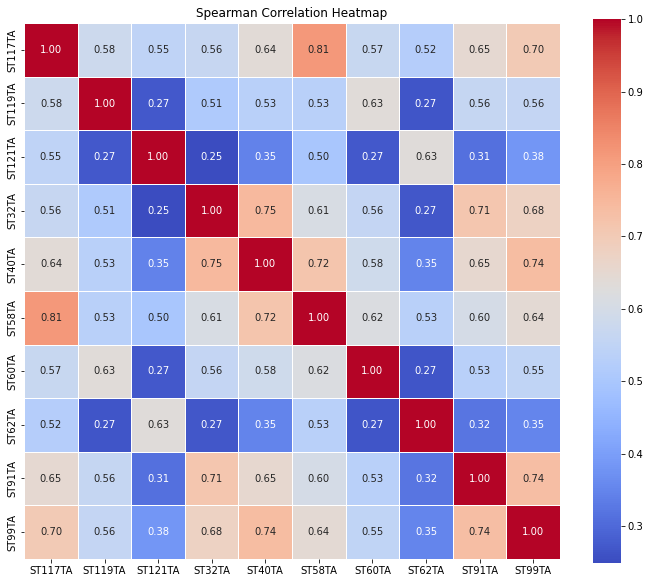

In [628]:
import seaborn as sns
import matplotlib.pyplot as plt
correaltion_matrix = merged_uscffsx6_uscffsl51.corr(method='spearman')
plt.figure(figsize=(12, 10))
sns.heatmap(correaltion_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, square=True, linewidths=.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

In [629]:
from functools import reduce

merged_df = reduce(lambda left, right: pd.merge(left, right, on=["RID", "EXAMDATE"], how='outer'), dfs)
len(merged_df)

18374

In [630]:
merged_df.head(20)

,RID,EXAMDATE,APVOLUME,CSFNFL,PLASMAPTAU181,PTGENDER,PTDOB,MHPSYCH,MH2NEURL,MH14ALCH,MH15DRUG,MH16SMOK,TAU,PTAU,ABETA42_40,ABETA42,ST117TA,ST119TA,ST121TA,ST32TA,ST40TA,ST58TA,ST60TA,ST62TA,ST91TA,ST99TA
0,1,2005-08-18,NaN,NaN,NaN,2.0,12/1944,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2005-08-17,10.0,NaN,NaN,1.0,04/1931,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2010-09-22,10.0,NaN,11.939,1.0,04/1931,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2011-09-19,10.0,NaN,12.936,1.0,04/1931,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2012-09-26,-4.0,NaN,13.563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,2013-09-09,-4.0,NaN,15.506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2,2014-10-13,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2,2015-09-22,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2,2016-09-27,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,2017-10-18,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [631]:
merged_df.describe()

,RID,APVOLUME,CSFNFL,PLASMAPTAU181,PTGENDER,MHPSYCH,MH2NEURL,MH14ALCH,MH15DRUG,MH16SMOK,TAU,PTAU,ABETA42_40,ABETA42,ST117TA,ST119TA,ST121TA,ST32TA,ST40TA,ST58TA,ST60TA,ST62TA,ST91TA,ST99TA
count,18374.000000,6793.000000,415.000000,3819.000000,5345.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3183.000000,3171.000000,446.000000,3212.000000,5274.000000,5274.000000,5401.000000,5274.000000,5274.000000,5274.000000,5274.000000,5401.000000,5274.000000,5274.000000
mean,4991.931806,1.343530,1465.816867,18.961121,1.426006,0.348801,0.314394,0.043876,0.009470,0.398043,286.860669,27.284298,0.065126,1037.306336,2.603308,3.539679,2.205641,2.747031,2.747196,2.584277,3.499641,2.182573,2.782660,2.791021
std,32929.128764,6.294902,1020.097069,14.719812,0.751369,0.476666,0.464347,0.204852,0.096866,0.489572,128.434802,14.273994,0.044928,607.681723,0.206476,0.495152,0.272779,0.230834,0.215853,0.220439,0.439525,0.259656,0.223658,0.201916
min,1.000000,-4.000000,405.000000,0.362000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.080000,8.000000,0.022000,203.000000,1.456000,1.238000,1.252000,1.613000,1.579000,1.575000,1.341000,1.246000,1.575000,1.626000
25%,2010.000000,-4.000000,967.500000,11.105000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,195.700000,17.170000,0.041250,580.150000,2.479000,3.323250,2.028000,2.618000,2.642000,2.456000,3.290000,2.020000,2.664250,2.688000
50%,4395.000000,-4.000000,1250.000000,16.343000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,257.000000,23.540000,0.055000,847.450000,2.616000,3.631000,2.217000,2.771500,2.774000,2.599000,3.566500,2.194000,2.807000,2.805000
75%,5198.000000,9.000000,1644.000000,23.516500,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,344.700000,33.485000,0.089750,1389.875000,2.743750,3.868000,2.392000,2.900000,2.892000,2.738000,3.790750,2.358000,2.933000,2.922000
max,999999.000000,10.000000,12647.000000,451.398000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1018.000000,108.500000,0.827000,4779.000000,3.287000,4.717000,3.159000,3.449000,3.294000,3.256000,4.684000,3.137000,3.420000,3.409000


In [632]:
merged_df["RID"].nunique()

4382

In [633]:
dependent_variables = ["ABETA42","ABETA42_40", "APVOLUME","TAU", "PTAU", "PLASMAPTAU181", "CSFNFL", "PTGENDER", "PTDOB", "MH14ALCH", "MH15DRUG", "MH16SMOK", "MH2NEURL", "MHPSYCH"]

# Define target variable names
target_names = [
    "ST58TA",  # Cortical Thickness Average of Left Superior Temporal
    "ST117TA", # Cortical Thickness Average of Right Superior Temporal
    "ST40TA",  # Cortical Thickness Average of Left Middle Temporal
    "ST99TA",  # Cortical Thickness Average of Right Middle Temporal
    "ST32TA",  # Cortical Thickness Average of Left Inferior Temporal
    "ST91TA",  # Cortical Thickness Average of Right Inferior Temporal
    "ST60TA",  # Cortical Thickness Average of Left Temporal Pole
    "ST119TA", # Cortical Thickness Average of Right Temporal Pole
    "ST62TA",  # Cortical Thickness Average of Left Transverse Temporal
    "ST121TA"  # Cortical Thickness Average of Right Transverse Temporal
]

non_na_count = {}

for variable in dependent_variables:
    non_na_target_counts = merged_df[~merged_df[variable].isna()][target_names].notna().sum()
    non_na_count[variable] = non_na_target_counts

result_df = pd.DataFrame(non_na_count)
print(f"The number of non-NaN values in the dependent variables and target variables are as follows:\n")
print(result_df)

The number of non-NaN values in the dependent variables and target variables are as follows:

         ABETA42  ABETA42_40  APVOLUME  TAU  PTAU  PLASMAPTAU181  CSFNFL  \
ST58TA        89           0      1292   89    89            733       0   
ST117TA       89           0      1292   89    89            733       0   
ST40TA        89           0      1292   89    89            733       0   
ST99TA        89           0      1292   89    89            733       0   
ST32TA        89           0      1292   89    89            733       0   
ST91TA        89           0      1292   89    89            733       0   
ST60TA        89           0      1292   89    89            733       0   
ST119TA       89           0      1292   89    89            733       0   
ST62TA        94           0      1293   94    94            733       0   
ST121TA       94           0      1293   94    94            733       0   

         PTGENDER  PTDOB  MH14ALCH  MH15DRUG  MH16SMOK  MH2NEURL  MHP

In [634]:
dependent_variable_minus_four_count = {}

for variable in dependent_variables:
    dependent_variable_minus_four_count[variable] = (
        merged_df[merged_df[variable].notna() & 
        merged_df[target_names].notna().all(axis=1)][variable] == -4
    ).sum()

print(f"The number of -4 values in the dependent variables where all the target variables and dependent variables are non-NaN are as follows:\n")
print(pd.DataFrame(dependent_variable_minus_four_count, index=[0]))
print(f"\n We got to also remove the data points where the dependent variables have -4 values as they are code for missing data")

The number of -4 values in the dependent variables where all the target variables and dependent variables are non-NaN are as follows:

   ABETA42  ABETA42_40  APVOLUME  TAU  PTAU  PLASMAPTAU181  CSFNFL  PTGENDER  \
0        0           0      1256    0     0              0       0         0   

   PTDOB  MH14ALCH  MH15DRUG  MH16SMOK  MH2NEURL  MHPSYCH  
0      0         0         0         0         0        0  

 We got to also remove the data points where the dependent variables have -4 values as they are code for missing data


In [635]:
def filter_dataframe(variable) -> pd.DataFrame:
    """ 
    Filter the dataframe to keep only rows that meet the following conditions:
    Condition 1: The value in the variable column must NOT be NaN
    Condition 2: The value in the variable column must NOT be -4
    Condition 3: All values in the target_names columns for a row must NOT be NaN

    This ensures that we do not have NaN values and -4 values in the dependent variable column,

    Parameters:
        variable (str): The name of the dependent variable column
    
    Returns:
        pd.DataFrame: The filtered DataFrame containing only rows where both the variable and target_names columns are not NaN
    """
    
    return merged_df[
        (~merged_df[variable].isna()) &                       # Dependent variable column must NOT be NaN
        (merged_df[variable] != -4) &                         # Dependent variable column must NOT be -4
        (merged_df[target_names].notna().all(axis=1))         # All target columns must NOT be NaN
    ]

# Alternative for Condition 3: ~merged_df[target_names].isna().any(axis=1) 
# The former is more direct and readable

In [636]:
remove_dependent_variables = ["ABETA42_40", "CSFNFL"]

dependent_variables = [variable for variable in dependent_variables if variable not in remove_dependent_variables]
dependent_variables.remove("PTDOB")             #  Remove PTDOB for now, Jonathan removed it, will have to find the reason in his dissertation
dependent_variables.remove("PTGENDER")          #  Remove PTGENDER for now, It has only 2 unique values, not useful for regression
print(dependent_variables)

['ABETA42', 'APVOLUME', 'TAU', 'PTAU', 'PLASMAPTAU181', 'MH14ALCH', 'MH15DRUG', 'MH16SMOK', 'MH2NEURL', 'MHPSYCH']


In [637]:
import os

# Create directories to save the synthetic and test data
if not os.path.exists("../synthetic_data"):
    try:
        os.makedirs("../synthetic_data")
        print(f"'synthetic_data' directory created successfully")
    except OSError as e:
        print(f"Error creating directory 'synthetic_data' : {e}")
else:
    print(f"'synthetic_data' directory already exists")

if not os.path.exists("../test_data"):
    try:
        os.makedirs("../test_data")
        print(f"'test_data' directory created successfully")
    except OSError as e:
        print(f"Error creating directory 'test_data' : {e}")
else:
    print(f"'test_data' directory already exists")

'synthetic_data' directory already exists
'test_data' directory already exists


In [638]:
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.preprocessing import StandardScaler

# Define the kernel for the Gaussian Process Regressor model
kernel = C(1.0, (1e-4, 1e3)) * RBF(1.0, (1e-4, 1e3)) + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e1))

# Initialize the Gaussian Process Regressor model
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20)

for dependent_var in dependent_variables:
    print(f"Dependent variable: {dependent_var}")

    # Filter the dataframe to get all the non-NaN values for the dependent variable and target variables
    filtered_df = filter_dataframe(dependent_var)
    
    # print(filtered_df)
    # print(f"length:{len(filtered_df)}")

    # Extract the independent variable (X) and target variable (y) values
    X = filtered_df[dependent_var].values
    y = filtered_df[target_names].values
    # print(X.shape)
    # print(y.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    print(f"Using X_train: {X_train.shape} and y_train: {y_train.shape} to generate synthetic data")
    print(f"X_test: {X_test.shape} y_test: {y_test.shape} to be left for testing")

    scalar = StandardScaler()
    X_train = scalar.fit_transform(X_train.reshape(-1, 1))
    X_test = scalar.transform(X_test.reshape(-1, 1))

    X_train = X_train.reshape(-1, 1)

    # Fit the Gaussian Process Regressor model to the training data
    gpr.fit(X_train, y_train)

    # Generate new feature points in the range of X_train
    X_synthetic = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
    X_synthetic = scalar.transform(X_synthetic)

    # Predict synthetic data using the trained Gaussian Process Regressor model
    y_pred, y_std = gpr.predict(X_synthetic, return_std=True)

    # Add some noise to simulate more realistic data/ introduce uncertainty/variability
    noise = np.random.normal(0, y_std[:, None], y_pred.shape)
    y_synthetic = y_pred + noise

    X_synthetic_original = scalar.inverse_transform(X_synthetic)

    print(f"Generated synthetic data for {dependent_var}")
    print(f"X_synthetic: {X_synthetic.shape}, y_synthetic: {y_synthetic.shape}")
    # print(f"X_synthetic: {X_synthetic}, y_synthetic: {y_synthetic}")
    print(f"Training X range: {X.min()} : {X.max()}")
    print(f"Synthetic X range: {X_synthetic_original.min()} : {X_synthetic_original.max()}, shape: {X_synthetic_original.shape}")
    print(f"Synthetic X range scaled: {X_synthetic.min()} : {X_synthetic.max()}")
    print(f"Original y range: {y.min()} : {y.max()}")
    print(f"Synthetic y range: {y_synthetic.min()} : {y_synthetic.max()}")

    synthetic_data = pd.DataFrame({
        f"{dependent_var}_synthetic_scaled": X_synthetic.flatten(),
        f"{dependent_var}_synthetic_original": X_synthetic_original.flatten(),
    })

    test_data = pd.DataFrame({
        f"{dependent_var}_test": X_test.flatten(),
        f"{dependent_var}_test_original": scalar.inverse_transform(X_test).flatten(),
    })


    for i in range(y_synthetic.shape[1]):
        synthetic_data[target_names[i]] = y_synthetic[:, i]
        test_data[target_names[i]] = y_test[:, i]
    
    # print(f"synthetic_data{synthetic_data.head()}")
    # print(f"test_data{test_data.head()}")
    synthetic_data.to_csv(f"../synthetic_data/synthetic_data_{dependent_var}.csv", index=False)
    test_data.to_csv(f"../test_data/test_data_{dependent_var}.csv", index=False)
    print()


Dependent variable: ABETA42
Using X_train: (53,) and y_train: (53, 10) to generate synthetic data
X_test: (36,) y_test: (36, 10) to be left for testing
Generated synthetic data for ABETA42
X_synthetic: (1000, 1), y_synthetic: (1000, 10)
Training X range: 359.9 : 3020.0
Synthetic X range: 359.9000000000001 : 3020.0, shape: (1000, 1)
Synthetic X range scaled: -1.3871896351703303 : 2.9345963027779467
Original y range: 1.565 : 4.191
Synthetic y range: 1.2462085230589413 : 4.340916580281728

Dependent variable: APVOLUME
Using X_train: (21,) and y_train: (21, 10) to generate synthetic data
X_test: (15,) y_test: (15, 10) to be left for testing
Generated synthetic data for APVOLUME
X_synthetic: (1000, 1), y_synthetic: (1000, 10)
Training X range: 3.0 : 10.0
Synthetic X range: 3.0 : 10.0, shape: (1000, 1)
Synthetic X range scaled: -3.6398333886009393 : 1.1804865044111148
Original y range: 1.426 : 4.236
Synthetic y range: 0.8744228235155473 : 4.495785845977963

Dependent variable: TAU
Using X_tr

C:\Users\shanb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Generated synthetic data for PTAU
X_synthetic: (1000, 1), y_synthetic: (1000, 10)
Training X range: 9.95 : 103.7
Synthetic X range: 9.95 : 103.7, shape: (1000, 1)
Synthetic X range scaled: -1.1671916292349729 : 5.307035756687096
Original y range: 1.565 : 4.191
Synthetic y range: 1.2918891448961016 : 4.473837064818093

Dependent variable: PLASMAPTAU181
Using X_train: (439,) and y_train: (439, 10) to generate synthetic data
X_test: (294,) y_test: (294, 10) to be left for testing
Generated synthetic data for PLASMAPTAU181
X_synthetic: (1000, 1), y_synthetic: (1000, 10)
Training X range: 0.468 : 120.674
Synthetic X range: 0.46799999999999997 : 120.67400000000002, shape: (1000, 1)
Synthetic X range scaled: -1.4817183024102352 : 8.421883618241727
Original y range: 1.238 : 4.619
Synthetic y range: 1.244485430456724 : 4.845954023501699

Dependent variable: MH14ALCH
Using X_train: (44,) and y_train: (44, 10) to generate synthetic data
X_test: (30,) y_test: (30, 10) to be left for testing
Genera

C:\Users\shanb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Generated synthetic data for MH16SMOK
X_synthetic: (1000, 1), y_synthetic: (1000, 10)
Training X range: 0.0 : 1.0
Synthetic X range: 0.0 : 1.0, shape: (1000, 1)
Synthetic X range scaled: -0.7934920476158722 : 1.260252075625209
Original y range: 1.622 : 4.294
Synthetic y range: 1.1972822377999042 : 4.4289029826777195

Dependent variable: MH2NEURL
Using X_train: (44,) and y_train: (44, 10) to generate synthetic data
X_test: (30,) y_test: (30, 10) to be left for testing


C:\Users\shanb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Generated synthetic data for MH2NEURL
X_synthetic: (1000, 1), y_synthetic: (1000, 10)
Training X range: 0.0 : 1.0
Synthetic X range: 0.0 : 1.0, shape: (1000, 1)
Synthetic X range scaled: -0.6831300510639732 : 1.4638501094227998
Original y range: 1.622 : 4.294
Synthetic y range: 1.4471827696767745 : 4.4253849266830025

Dependent variable: MHPSYCH
Using X_train: (44,) and y_train: (44, 10) to generate synthetic data
X_test: (30,) y_test: (30, 10) to be left for testing
Generated synthetic data for MHPSYCH
X_synthetic: (1000, 1), y_synthetic: (1000, 10)
Training X range: 0.0 : 1.0
Synthetic X range: 0.0 : 1.0, shape: (1000, 1)
Synthetic X range scaled: -0.7191949522280763 : 1.3904435743076144
Original y range: 1.622 : 4.294
Synthetic y range: 1.498819690569552 : 4.390741924916499



C:\Users\shanb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
